In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from fastai.structured import *
from fastai.column_data import *

In [2]:
# lets load up the data, keep in mind the the unzipped version is not in the repo
df = pd.read_csv('course_ratings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175347 entries, 0 to 175346
Data columns (total 7 columns):
user           175347 non-null object
course         175347 non-null object
category       175347 non-null object
rating         175347 non-null float64
job            175347 non-null object
institution    175347 non-null object
state          175347 non-null object
dtypes: float64(1), object(6)
memory usage: 9.4+ MB


In [4]:
df.columns

Index(['user', 'course', 'category', 'rating', 'job', 'institution', 'state'], dtype='object')

In [5]:
df.describe()

,rating
count,175347.000000
mean,4.030533
std,0.571618
min,0.910000
25%,3.690000
50%,4.000000
75%,4.590000
max,12.450000


(array([  435.,    83.,    35.,    66.,   159.,   204.,   341.,  1311.,  7622.,  3366.,  6484., 15929.,
        43538., 17267., 17940., 22904., 35465.,  2194.,     0.,     1.,     0.,     0.,     0.,     0.,
            0.,     1.,     0.,     0.,     0.,     0.,     0.,     0.,     1.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     1.]),
 array([ 0.91  ,  1.1408,  1.3716,  1.6024,  1.8332,  2.064 ,  2.2948,  2.5256,  2.7564,  2.9872,  3.218 ,
         3.4488,  3.6796,  3.9104,  4.1412,  4.372 ,  4.6028,  4.8336,  5.0644,  5.2952,  5.526 ,  5.7568,
         5.9876,  6.2184,  6.4492,  6.68  ,  6.9108,  7.1416,  7.3724,  7.6032,  7.834 ,  8.0648,  8.2956,
         8.5264,  8.7572,  8.988 ,  9.2188,  9.4496,  9.6804,  9.9112, 10.142 , 10.3728, 10.6036, 10.8344,
        11.0652, 11.296 , 11.5268, 11.7576, 11.9884, 12.2192, 12.45  ]),
 <a list of 50 Patch objects>)

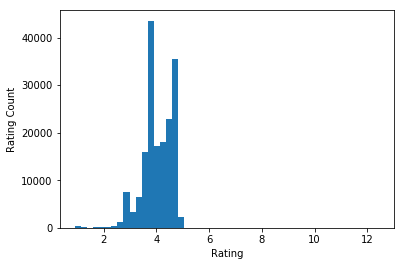

In [6]:
plt.xlabel("Rating")
plt.ylabel("Rating Count")
plt.hist(df['rating'], bins=50)

In [7]:
print("Mean: {} - Median: {}".format(df['rating'].mean(),df['rating'].median()))

Mean: 4.03053282919012 - Median: 4.0


In [8]:
df.nunique()

user           52118
course           219
category          14
rating           270
job               45
institution       15
state             60
dtype: int64

In [9]:
cat_vars = ['user','course','category','job','institution','state']
dep = 'rating'

In [10]:
joined = df.copy()

In [11]:
joined = joined[cat_vars+[dep]].copy()

In [12]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175347 entries, 0 to 175346
Data columns (total 7 columns):
user           175347 non-null object
course         175347 non-null object
category       175347 non-null object
job            175347 non-null object
institution    175347 non-null object
state          175347 non-null object
rating         175347 non-null float64
dtypes: float64(1), object(6)
memory usage: 9.4+ MB


In [13]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()


In [14]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175347 entries, 0 to 175346
Data columns (total 7 columns):
user           175347 non-null category
course         175347 non-null category
category       175347 non-null category
job            175347 non-null category
institution    175347 non-null category
state          175347 non-null category
rating         175347 non-null float64
dtypes: category(6), float64(1)
memory usage: 5.9 MB


In [17]:
n = len(joined); n

175347

In [18]:
idxs = get_cv_idxs(n, val_pct=150000/n)

In [19]:
idxs

array([153607,  86137, 166499, ..., 106568,  18665, 137159])